In [40]:
from utils import *

In [41]:
root_dir = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/'
fp1 = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_1'
fp2 = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_2'
file_path1 = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_1/acc_00002.csv'
file_path2 = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_2/acc_00002.csv'

file_path_len1 = folder_total_len(fp1)
print(file_path_len1)
file_path_len2 = folder_total_len(fp2)
print(file_path_len2)

2803
871


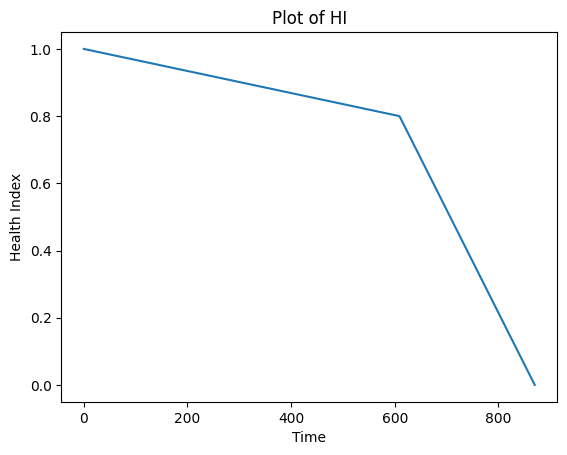

1962
841
2803


In [42]:
tp = 0.8
slp = 0.7
hi = two_stage_hi(tp, slp, file_path_len2, True)
len1 = int(file_path_len1 * slp)
print(len1)

len2 = file_path_len1 - len1
print(len2)

print(len1 + len2)

In [43]:
sep_point = int(file_path_len1 * slp)

hi1 = hi[:sep_point]
print(len(hi1))
print(hi1)

871
[1.         0.99967105 0.99934211 0.99901316 0.99868421 0.99835526
 0.99802632 0.99769737 0.99736842 0.99703947 0.99671053 0.99638158
 0.99605263 0.99572368 0.99539474 0.99506579 0.99473684 0.99440789
 0.99407895 0.99375    0.99342105 0.99309211 0.99276316 0.99243421
 0.99210526 0.99177632 0.99144737 0.99111842 0.99078947 0.99046053
 0.99013158 0.98980263 0.98947368 0.98914474 0.98881579 0.98848684
 0.98815789 0.98782895 0.9875     0.98717105 0.98684211 0.98651316
 0.98618421 0.98585526 0.98552632 0.98519737 0.98486842 0.98453947
 0.98421053 0.98388158 0.98355263 0.98322368 0.98289474 0.98256579
 0.98223684 0.98190789 0.98157895 0.98125    0.98092105 0.98059211
 0.98026316 0.97993421 0.97960526 0.97927632 0.97894737 0.97861842
 0.97828947 0.97796053 0.97763158 0.97730263 0.97697368 0.97664474
 0.97631579 0.97598684 0.97565789 0.97532895 0.975      0.97467105
 0.97434211 0.97401316 0.97368421 0.97335526 0.97302632 0.97269737
 0.97236842 0.97203947 0.97171053 0.97138158 0.97105263 0.

In [44]:
hi2 = hi[sep_point:]
print(len(hi2))
print(hi2)

0
[]


In [45]:
from dataset_2stage import CustomDataSet_2stage

Learning_set = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set'
Validation_set = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Validation_set'
work_condition = 1
acquire_part = 1
train_vali = [Learning_set, Validation_set, 3]
sX = [100, 32, 64, 16, 32, 32, 3, 1, 50, 64, 30, 80, 70]

train_data_list = CustomDataSet_2stage(Learning_set, work_condition, acquire_part, transform=None, mode='train', label_style=2, two_stage_hp=[sX[11]/100, sX[12]/100]).get_file_paths()
train_data = CustomDataSet_2stage(Learning_set, work_condition, acquire_part, transform=None, mode='train', label_style=2, two_stage_hp=[sX[11]/100, sX[12]/100])

In [46]:
file_p = train_data_list[0]
file_p

'/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_1/acc_01836.csv'

In [47]:
len(train_data)

2571

In [48]:
hi_part1 = []
hi_part2 = []

for i in range(10):
    if train_data[i][1] > sX[11]/100:
        hi_part1.append(train_data[i])
    else:
        hi_part2.append(train_data[i])

In [49]:
hi_part1

[(tensor([[ 0.0023,  0.0908,  0.0684,  ..., -0.0699, -0.0247, -0.2295]]),
  0.8128505864354921),
 (tensor([[-0.1145,  0.1813,  0.1845,  ...,  0.1031, -0.2147, -0.0485]]),
  0.969913309535951),
 (tensor([[0.2362, 0.0035, 0.3642,  ..., 0.2239, 0.0782, 0.1484]]),
  0.8789393166751658),
 (tensor([[ 0.0987, -0.0434, -0.3244,  ..., -0.0053,  0.2310,  0.4990]]),
  0.9713411524732279),
 (tensor([[-0.2660,  0.2039,  0.1010,  ...,  0.1593,  0.2295,  0.1607]]),
  0.8142784293727691),
 (tensor([[ 0.0437,  0.1540, -0.0284,  ...,  0.2406,  0.4425,  0.1498]]),
  0.9457419683834778),
 (tensor([[0.1889, 0.1940, 0.0940,  ..., 0.6784, 0.3577, 0.2788]]),
  0.9740948495665477),
 (tensor([[ 0.3043, -0.0542,  0.0985,  ...,  0.2173, -0.1009,  0.1737]]),
  0.9755226925038246),
 (tensor([[-0.0075, -0.3799,  0.0779,  ..., -0.3527, -0.0657, -0.1529]]),
  0.9463539010708822),
 (tensor([[0.0737, 0.1890, 0.1259,  ..., 0.1414, 0.0350, 0.0100]]),
  0.8329423763386028)]

In [50]:
def get_file_paths(root_dir, work_condition, mode='train'):
    file_paths = []
    if mode == 'train':
        wk = 'Bearing'
        wk = wk + str(work_condition)
        for folder in os.listdir(root_dir):
            if wk in folder:
                folder_path = os.path.join(root_dir, folder)
                if os.path.isdir(folder_path):
                    for filename in os.listdir(folder_path):
                        if filename.endswith('.csv'):
                            pathes = os.path.join(folder_path, filename)
                            pathes = os.path.normpath(pathes)
                            file_paths.append(pathes)
    
    elif mode == 'test':
        for files in os.listdir(root_dir):
            if files.endswith('.csv'):
                pathes = os.path.join(root_dir, files)
                pathes = os.path.normpath(pathes)
                full = check_full_data(pathes)
                if full:
                    file_paths.append(pathes)

    return file_paths

l = get_file_paths(Learning_set, 1)

len(l)

3674

In [51]:
work_condition = 1
root_dir = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/'
file_path1 = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_1/acc_00002.csv'
fp = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_1'

In [62]:
file_paths = []
wk = 'Bearing'
wk = wk + str(work_condition)
two_stage = [0.8, 0.7]
acq = 1

for folder in os.listdir(root_dir):
    if wk in folder:
        folder_path = os.path.join(root_dir, folder)
        print(folder_path)
        folder_tot = folder_total_len(folder_path)
        print(folder_tot)
        sep_point = int(folder_tot * two_stage[1])
        print(sep_point)
        print(folder_tot - sep_point)

        
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.endswith('.csv'):
                    pathes = os.path.join(folder_path, filename)
                    pathes_num = int(pathes.split('/')[-1].split('.')[-2].split('_')[-1])
                    if acq == 1:
                        if pathes_num <= sep_point:
                            pathes = os.path.normpath(pathes)
                            file_paths.append(pathes)
                    if acq == 2:
                        if pathes_num > sep_point:
                            pathes = os.path.normpath(pathes)
                            file_paths.append(pathes)

/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_1
2803
1962
841
/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_2
871
609
262


In [63]:
len(file_paths)

2571

In [56]:
from dataset_2stage import CustomDataSet_2stage

In [67]:
print('go')
Learning_set = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set'
Validation_set = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Validation_set'
wc = 1
acq = 1
train_vali = [Learning_set, Validation_set, 3]
train_data = CustomDataSet_2stage(Learning_set, work_condition=wc, acq_part=acq)
print(train_data[0])
print(len(train_data))

go
(tensor([[ 0.0023,  0.0908,  0.0684,  ..., -0.0699, -0.0247, -0.2295]]), 0.8128505864354921)
2571


In [68]:
for i in [1,2]:
    print(i)

1
2


In [73]:
from torch.utils.data import DataLoader

num_smaple = 0
val_loader = DataLoader(train_data, batch_size=32)
for data, labels in val_loader:
    # print(data)
    # print(labels.size(0))
    num_smaple += labels.size(0)

print(num_smaple)

2571
